In [1]:
import pandas as pd
import xgboost as xgp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # Interactive Data Visualization
import sys

In [67]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
volume_df = pd.read_csv('../data_mine/volume_data.csv')
facility_df = pd.read_csv('../data/facility_data.csv')
to_drop_cols =['order_number', 'Unnamed: 0','facilities', 'facility_id', 'operation_sequence', 'total_quantity_complete', 'facility_description', 'operation_status', 'total_quantity_scrap', 'start', 'fin', 'B0010', 'C0010', 'D0010', 'facilities']
columns_to_divide = ['B0021', 'F0010', 'B0010', 'K0010', 'K0020', 'B0012', 'B0020', 'B0040', 'B0070', 'B0080',
                      'C0040', 'C0060', 'C0080', 'C0010', 'C0020', 'J0020', 'H0020', 'D0010', 'H0070', 'H0010',
                      'D0020', 'H0030', 'C0050', 'C0100', 'C0110', 'J0025', 'B0025', 'C0075', 'B0060', 'B0090',
                      'C0090', 'B0030', 'C0070', 'K0011', 'H0046', 'H0050', 'B0050', 'H0060', 'B0015', 'H0045',
                      'B0062', 'J0060', 'H0051', 'J0050', 'C0030', 'C0031', 'F0020', 'C0035']
substrings = ['GL', 'J', 'K']
for i in volume_df.columns:    
    if any(sub in i for sub in substrings):
        to_drop_cols.append(i)
volume_df[columns_to_divide] = volume_df[columns_to_divide] / 1000
volume_df.head()

,order_number,Unnamed: 0,operation_sequence,facility_id,total_quantity_complete,total_quantity_scrap,facility_description,operation_status,start,fin,B0021,F0010,B0010,K0010,K0020,B0012,B0020,B0040,B0070,B0080,C0040,C0060,C0080,C0010,C0020,J0020,H0020,D0010,H0070,H0010,D0020,H0030,C0050,C0100,C0110,J0025,B0025,C0075,B0060,B0090,C0090,B0030,C0070,K0011,H0046,H0050,B0050,H0060,B0015,H0045,B0062,J0060,H0051,J0050,C0030,C0031,F0020,C0035,y,len
0,M875305,1861,90,F0010,1,0,WASHING & WIPING RAIL,40,2021-10-08 13:54:28+00:00,2021-11-29 15:37:54+00:00,805.20,1001.059,NaN,249.064,76.910,538.302,3566.93,546.714,1210.318,1129.798,86.26,2359.0389,959.316,NaN,362.858,132.906,NaN,NaN,3.168,NaN,15.918,154.410,NaN,NaN,2.08,NaN,6976.839,797.478,6181.614,203.68,591.260,639.42,48.04,60.72,3.168,3.320,624.7,4.144,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1249.0,2180.0
1,M919255,2507,90,F0010,4,0,WASHING & WIPING RAIL,40,2021-10-08 13:22:07+00:00,2021-11-29 15:38:08+00:00,805.20,1027.629,NaN,245.304,119.006,446.962,3566.93,546.714,1210.318,1144.898,86.26,2373.9389,937.636,NaN,358.378,139.186,NaN,NaN,3.168,NaN,15.918,154.410,NaN,NaN,2.08,NaN,6976.839,808.471,6257.614,127.68,596.761,639.42,48.04,44.88,3.168,3.320,624.7,4.144,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1250.0,2674.0
2,M914207,3370,90,F0010,5,0,WASHING & WIPING RAIL,40,2022-03-04 16:18:11+00:00,2022-04-08 20:37:29+00:00,3369.92,566.756,NaN,245.505,83.880,804.416,1936.27,228.642,296.000,259.606,116.10,3261.2350,919.530,NaN,807.733,157.952,3.4,NaN,NaN,NaN,23.910,508.946,NaN,36.22,NaN,NaN,2690.400,970.874,5073.992,1087.70,286.362,225.60,39.60,30.72,3.040,24.284,303.0,24.880,44.0,1.16,386.0,NaN,4.98,NaN,NaN,NaN,NaN,NaN,844.0,2480.0
3,M899965,7847,110,K0020,5,0,WRAPPING & PACKAGING,40,2021-10-08 14:09:09+00:00,2021-11-29 16:28:46+00:00,805.20,871.901,NaN,358.440,106.910,750.440,3566.93,546.714,1210.318,1129.798,86.26,2359.0389,949.886,NaN,362.858,132.906,NaN,NaN,3.168,NaN,15.000,154.410,NaN,NaN,2.08,NaN,6976.839,788.178,6181.614,203.68,605.170,639.42,48.04,60.72,3.168,3.320,624.7,4.144,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1250.0,1346.0
4,M876923,9215,90,F0010,2,0,WASHING & WIPING RAIL,40,2021-08-24 17:23:23+00:00,2021-11-05 12:25:59+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1747.0,2480.0


In [93]:
for i in facility_df.itertuples():            
    for f in i.facilities.split(' '):
        if len(f) == 5:
            facility_df.loc[i[0], f + '_one_hot'] = 1
facility_df['product_family'] = facility_df['product_family'].astype('category')
facility_df['product_model'] = facility_df['product_model'].astype('category')
one_hot_encoded = pd.get_dummies(facility_df, columns=['product_family', 'product_model']) 
one_hot_encoded.columns
# facility_df = pd.concat([facility_df, one_hot_encoded_datab], axis=1)
# facility_df.columns
merged_df = volume_df.merge(one_hot_encoded, how='inner', on='order_number')
df = merged_df.drop(columns=to_drop_cols)
df = df[df['B0021'].notna()]
df = df[df['y'] > 12]


In [94]:
sorted_cols = sorted(df.columns.to_list())
df = df[sorted_cols]

In [95]:
df.columns

Index(['B0010_one_hot', 'B0012', 'B0012_one_hot', 'B0015', 'B0020',
       'B0020_one_hot', 'B0021', 'B0021_one_hot', 'B0025', 'B0030', 'B0040',
       'B0040_one_hot', 'B0050', 'B0060', 'B0062', 'B0070', 'B0070_one_hot',
       'B0080', 'B0080_one_hot', 'B0090', 'C0010_one_hot', 'C0020',
       'C0020_one_hot', 'C0030', 'C0031', 'C0035', 'C0040', 'C0040_one_hot',
       'C0050', 'C0050_one_hot', 'C0060', 'C0060_one_hot', 'C0070', 'C0075',
       'C0080', 'C0080_one_hot', 'C0090', 'C0100', 'C0100_one_hot', 'C0110',
       'C0110_one_hot', 'D0010_one_hot', 'D0020', 'D0020_one_hot', 'F0010',
       'F0010_one_hot', 'F0020', 'H0010', 'H0010_one_hot', 'H0020',
       'H0020_one_hot', 'H0030', 'H0030_one_hot', 'H0045', 'H0046', 'H0050',
       'H0051', 'H0060', 'H0070', 'H0070_one_hot', 'J0020_one_hot',
       'J0025_one_hot', 'K0010_one_hot', 'K0020_one_hot', 'len',
       'product_family_HSR', 'product_family_SHS', 'product_model_55',
       'product_model_65', 'y'],
      dtype='object')

In [96]:
df.describe()

,B0010_one_hot,B0012,B0012_one_hot,B0015,B0020,B0020_one_hot,B0021,B0021_one_hot,B0025,B0030,B0040,B0040_one_hot,B0050,B0060,B0062,B0070,B0070_one_hot,B0080,B0080_one_hot,B0090,C0010_one_hot,C0020,C0020_one_hot,C0030,C0031,C0035,C0040,C0040_one_hot,C0050,C0050_one_hot,C0060,C0060_one_hot,C0070,C0075,C0080,C0080_one_hot,C0090,C0100,C0100_one_hot,C0110,C0110_one_hot,D0010_one_hot,D0020,D0020_one_hot,F0010,F0010_one_hot,F0020,H0010,H0010_one_hot,H0020,H0020_one_hot,H0030,H0030_one_hot,H0045,H0046,H0050,H0051,H0060,H0070,H0070_one_hot,J0020_one_hot,J0025_one_hot,K0010_one_hot,K0020_one_hot,len,product_family_HSR,product_family_SHS,product_model_55,product_model_65,y
count,1321.0,1473.000000,1285.0,1387.000000,1487.000000,1319.0,1487.000000,1319.0,1473.000000,911.000000,1487.000000,1388.0,1404.000000,1487.000000,1362.000000,1480.000000,1458.0,1487.000000,1463.0,1458.000000,144.0,1487.000000,139.0,95.000000,24.000000,5.00,1394.000000,764.0,598.000000,10.0,1487.000000,1464.0,1263.000000,1487.000000,1487.000000,1464.0,1487.000000,1255.000000,8.0,489.000000,8.0,19.0,1411.000000,16.0,1487.000000,1482.0,37.00,1102.000000,8.0,756.000000,13.0,1487.000000,13.0,575.000000,1307.000000,842.000000,689.000000,1315.000000,667.000000,13.0,52.0,1.0,1124.0,1116.0,1465.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000
mean,1.0,600.712634,1.0,75.808969,3354.186315,1.0,2410.252065,1.0,4571.336532,394.804105,716.727607,1.0,510.229100,4156.277008,794.305433,545.920992,1.0,657.445473,1.0,533.671562,1.0,618.600144,1.0,12.202442,6.490000,6.14,96.753666,1.0,5.300231,1.0,1575.708292,1.0,33.621722,679.914318,709.078409,1.0,423.850861,18.926252,1.0,7.122395,1.0,1.0,22.435667,1.0,660.010846,1.0,3.25,11.210263,1.0,9.316675,1.0,407.876687,1.0,2.287165,14.588508,8.460100,11.992932,7.735766,23.920139,1.0,1.0,1.0,1.0,1.0,2325.267577,0.336247,0.663753,0.523201,0.476799,933.575656
std,0.0,355.155309,0.0,63.112079,1101.304228,0.0,1257.313075,0.0,2738.947560,324.173817,425.659929,0.0,307.855423,1074.544769,719.350850,288.529517,0.0,316.699603,0.0,256.348420,0.0,269.217224,0.0,7.112719,3.131667,0.00,66.685959,0.0,5.564750,0.0,766.998755,0.0,22.690930,191.287573,185.805017,0.0,222.273567,13.213862,0.0,4.888658,0.0,0.0,20.339739,0.0,241.825744,0.0,0.00,9.401705,0.0,8.216965,0.0,139.077249,0.0,0.926976,15.982580,5.385911,7.945336,5.785124,29.584854,0.0,0.0,NaN,0.0,0.0,1840.270354,0.472584,0.472584,0.499629,0.499629,471.559522
min,1.0,4.000000,1.0,2.360000,801.849000,1.0,504.340000,1.0,172.720000,3.400000,37.196000,1.0,0.520000,1157.280000,30.000000,22.365000,1.0,179.636000,1.0,60.400000,1.0,87.140000,1.0,2.360000,2.360000,6.14,3.000000,1.0,0.370000,1.0,381.670000,1.0,1.704000,340.294000,292.403000,1.0,41.200000,0.559000,1.0,0.880000,1.0,1.0,0.125000,1.0,138.300000,1.0,3.25,0.170000,1.0,0.148000,1.0,105.470000,1.0,1.160000,0.510000,3.284000,4.980000,1.776000,0.320000,1.0,1.0,1.0,1.0,1.0,270.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,1.0,277.808000,1.0,40.000000,2528.204000,1.0,1465.730000,1.0,2325.020000,183.600000,347.880000,1.0,269.610000,3332.617000,98.000000,296.000000,1.0,374.352000,1.0,349.600000,1.0,390.642000,1.0,4.720000,2.360000,6.14,46.375000,1.0,2.560000,1.0,1063.100000,1.0,15.960000,538.059000,591.571000,1.0,260.840000,9.200000,1.0,2.328000,1.0,1.0,7.680000,1.0,457.729000,1.0,3.25,4.390000,1.0,0.720000,1.0,322.135000,1.0,1.160000,3.040000,5.010000,4.980000,4.144000,3.060000,1.0,1.0,1.0,1.0,1.0,1440.000000,0.000000,0.000000,0.000000,0.000000,623.000000
50%,1.0,602.000000,1.0,59.430000,3271.783000,1.0,2059.020000,1.0,4069.080000,292.900000,656.660000,1.0,566.800000,4159.490000,591.200000,512.993000,1.0,619.536000,1.0,509.360000,1.0,566.317000,1.0,14.160000,7.080000,6.14,85.583000,1.0,2.960000,1.0,1453.862000,1.0,36.000000,656.124000,703.133000,1.0,373.626000,14.780000,1.0,6.595000,1.0,1.0,15.918000,1.0,685.852000,1.0,3.25,8.640000,1.0,8.248000,1.0,380.342000,1.0,3.040000,7.232000,5.670000,8.385000,7.440000,3.720000,1.0,1.0,1.0,1.0,1.0

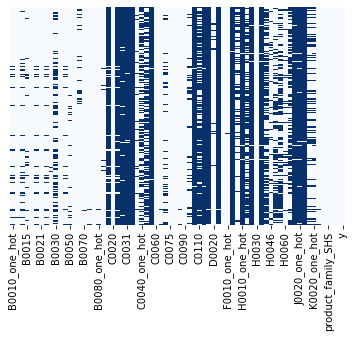

In [97]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

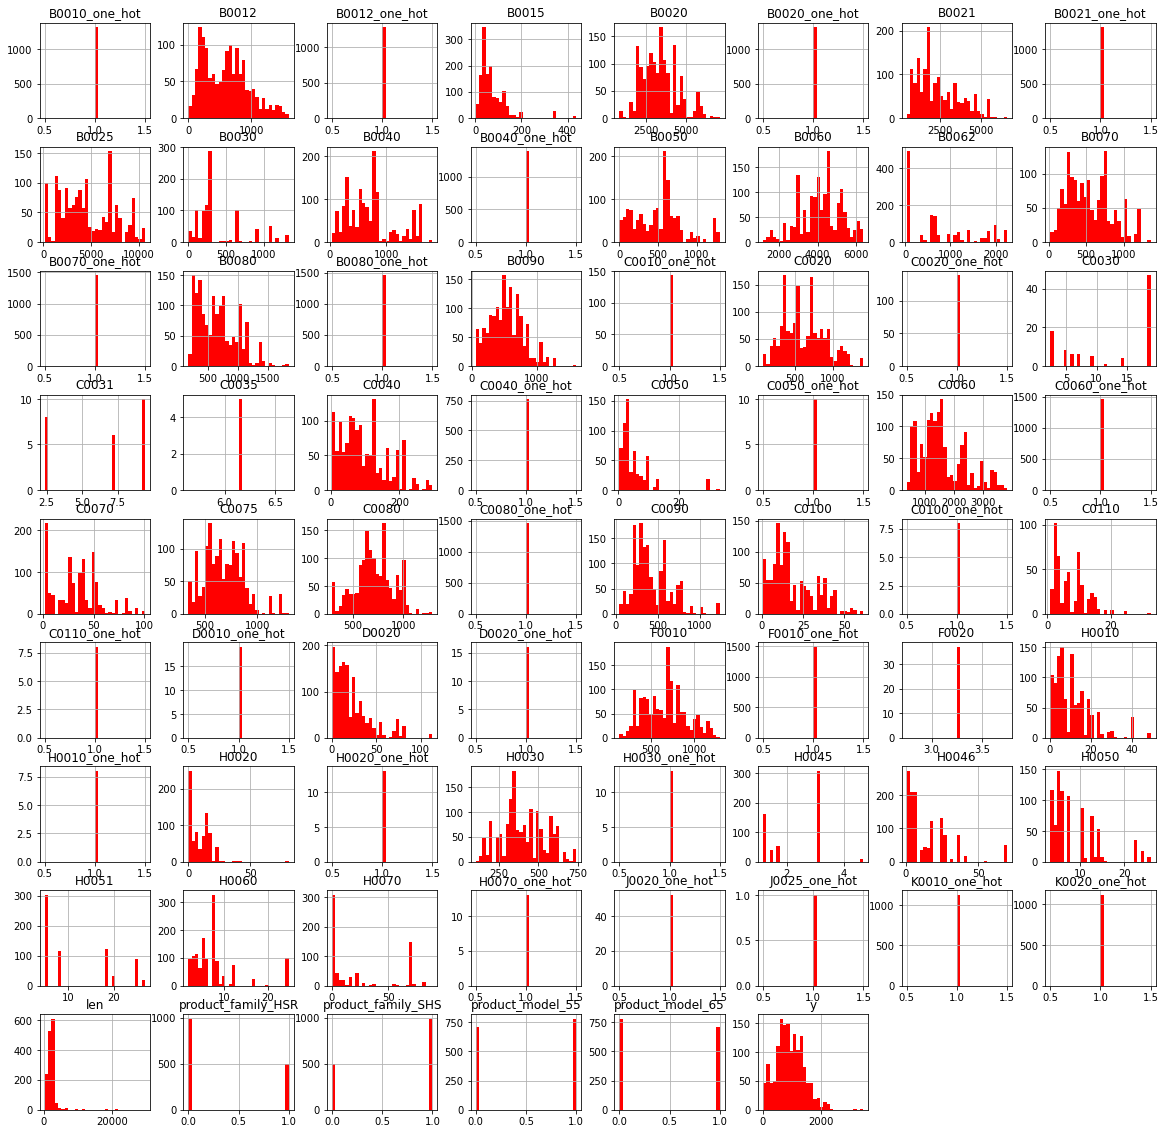

In [98]:
df.hist(bins = 30, figsize = (20,20), color = 'r');
plt.show()

In [99]:
X = df.drop(columns = ['y'])
y = df['y']

X = np.array(X)
y = np.array(y)

y = y.reshape(-1,1)
y.shape

(1487, 1)

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [101]:
X_train.shape

(1115, 69)

In [102]:
print(X_test.shape)

(372, 69)


In [78]:
# scaling the data before training the model
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler_x = StandardScaler()
# X = scaler_x.fit_transform(X)
# scaler_y = StandardScaler()
# y = scaler_y.fit_transform(y)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [103]:
import xgboost as xgb

model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 30, n_estimators = 100, device="cuda")

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=30, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [90]:
result = model.score(X_test, y_test)
print("Accuracy : {}".format(result))


Accuracy : 0.79923848529532


array([ 477.05176,  826.1608 ,  558.909  , 1007.99585, 1314.5511 ,
        515.2147 ,  347.35767,  916.0044 ,  843.14014,  619.0368 ],
      dtype=float32)

In [108]:
y_test[:10]

array([[ 483.],
       [ 880.],
       [ 439.],
       [1008.],
       [1318.],
       [ 480.],
       [ 347.],
       [ 942.],
       [ 624.],
       [ 668.]])

In [109]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 205.487 
MSE = 42224.81805449045 
MAE = 99.69968709638042 
R2 = 0.8074806068910574 
Adjusted R2 = 0.763494387935703


In [115]:
y_predict = model.predict(X_test)
print("PRE : TRUE")
for p, t in zip(y_predict[:10], y_test[:10]):
    print(int(p), ':', int(t[0]))



PRE : TRUE
477 : 483
826 : 880
558 : 439
1007 : 1008
1314 : 1318
515 : 480
347 : 347
916 : 942
843 : 624
619 : 668
